In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

%matplotlib inline

In [42]:
# Read business.csv file
df_business = pd.read_csv('business.csv')

# Get the following columns: address, attributes, categories, city, name, postal_code, review_count, stars, state
df_business = df_business[['address', 'attributes', 'categories', 'city', 'name', 'postal_code', 
                           'review_count', 'stars', 'state']]

# Get businesses in the 'state' of NV
df_business = df_business.loc[df_business['state'] == ('NV')]

# Create a column to check if the business is a 'Restaurant'
df_business['is a restaurant'] = df_business['categories'].str.contains("Restaurants")

# Filter dataframe for rows that are True for 'is a restaurant'
df_business = df_business.loc[df_business['is a restaurant'] == (True)]

# Get businesses in Las Vegas of NV
df_business = df_business.loc[df_business['city'].str.contains("Vegas")]

# Drop where attributes is NaN
df_business = df_business.dropna(subset=['attributes'])

# Reset index of df
df_business = df_business.reset_index(drop = True)
df_business

,address,attributes,categories,city,name,postal_code,review_count,stars,state,is a restaurant
0,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",Las Vegas,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True
2,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': ""{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,Dairy Queen,89146,33,2.0,NV,True
3,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ""'dressy'"", 'Corkage': '...","Restaurants, Pizza, Italian, American (New)",Las Vegas,Artisan Fine Dining Room,89102,3,2.0,NV,True
4,241 W Charleston Blvd,"{'BusinessParking': ""{'garage': False, 'street...","Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",Las Vegas,Bistro Divino,89102,3,4.5,NV,True
5,3655 Las Vegas Blvd S,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","French, Restaurants, Creperies",Las Vegas,La Creperie,89109,535,3.5,NV,True
6,2411 W Sahara Ave,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Buffets, Restaurants",Las Vegas,Feast Buffet,89102,287,3.0,NV,True
7,"3500 Las Vegas Blvd S, Ste E11","{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Sandwiches, Restaurants, Delis, Desserts, Food",Las Vegas,Stage Deli Of Las Vegas,89109,28,3.5,NV,True
8,1263 Silverado Ranch Blvd,"{'RestaurantsDelivery': 'True', 'BusinessParki...","Middle Eastern, Restaurants, Vegetarian, Juice...",Las Vegas,Pita Pit,89183,77,4.0,NV,True
9,"3342 E Sandhill Rd, Ste 11","{'GoodForDancing': 'False', 'GoodForKids': 'Fa...","Dive Bars, Food, Bars, Pubs, Restaurants, Nigh...",Las Vegas,Mr G's Pub & Grub,89121,27,4.0,NV,True


In [43]:
# Convert the dictionary objects in 'attributes' to columns in a new df
df_business["attributes"] = df_business["attributes"].apply(lambda x : dict(eval(x)) )
df_attributes = df_business["attributes"].apply(pd.Series)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,BYOBCorkage,NoiseLevel,RestaurantsTakeOut,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
0,False,True,False,True,'casual',"{'romantic': True, 'intimate': False, 'tourist...",False,'no',u'quiet',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,False,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,True,'dressy',NaN,True,'yes_corkage',u'quiet',False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'touris...",False,'yes_free',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'touris...",False,'yes_free',u'average',False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,True,False,NaN,'casual',NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,True,True,False,u'casual',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,False,False,'casual',"{'romantic': False, 'intimate': False, 'classy...",True,NaN,u'quiet',True,...,"{'monday': False, 'tuesday': False, 'friday': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Since 'Ambience' is a subjective measurement, we decided to remove it from the dataframe. 
# The definition for words like "romantic", "hipster", or "touristy" vary between Yelp users 
# and is difficult to account for.

#SCRAP NOISE LEVEL AND RESTAURANT ATTIRE BC THEY ARE ALSO SUBJECTIVE AND CANNOT BE EVALUATED AS TRUE AND FALSE
df_attributes = df_attributes.drop(["RestaurantsAttire","NoiseLevel"],axis = 1)
# Drop 'Ambience' column
df_attributes = df_attributes.drop(['Ambience'], axis = 1)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,BYOBCorkage,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,...,BestNights,DogsAllowed,DriveThru,Smoking,CoatCheck,AgesAllowed,DietaryRestrictions,AcceptsInsurance,Open24Hours,RestaurantsCounterService
0,False,True,False,True,False,'no',True,2,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,False,True,NaN,True,1,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,False,False,False,NaN,True,1,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,True,True,'yes_corkage',False,4,True,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,False,False,'yes_free',True,2,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,True,False,False,False,'yes_free',False,1,True,'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,True,False,NaN,NaN,NaN,True,2,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,True,True,False,False,NaN,True,1,True,'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,False,False,True,NaN,True,1,True,'no',...,"{'monday': False, 'tuesday': False, 'friday': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
list(df_attributes)

['OutdoorSeating',
 'BusinessAcceptsCreditCards',
 'RestaurantsDelivery',
 'RestaurantsReservations',
 'HasTV',
 'BYOBCorkage',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'RestaurantsGoodForGroups',
 'WiFi',
 'Caters',
 'GoodForKids',
 'Alcohol',
 'BusinessParking',
 'BikeParking',
 'HappyHour',
 'GoodForMeal',
 'Corkage',
 'BYOB',
 'RestaurantsTableService',
 'WheelchairAccessible',
 'ByAppointmentOnly',
 'BusinessAcceptsBitcoin',
 'GoodForDancing',
 'Music',
 'BestNights',
 'DogsAllowed',
 'DriveThru',
 'Smoking',
 'CoatCheck',
 'AgesAllowed',
 'DietaryRestrictions',
 'AcceptsInsurance',
 'Open24Hours',
 'RestaurantsCounterService']

In [46]:
# Ratio of missing NaN attributes
df_missing = pd.DataFrame([{'column':c, 'missing': (df_attributes[c].isnull().sum()/df_attributes.shape[0])} for c in df_attributes.columns])
df_missing = df_missing.sort_values('missing', ascending=False)
df_missing

# lists of columns that have a missing ratio greater than 0.25%
droppable_features = []
droppable_features.extend(df_missing[df_missing.missing > 0.25].column.tolist())
droppable_features

# Drop columns with more than 25% missing data
df_attributes.drop(droppable_features, axis=1, inplace=True)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'..."
2,False,True,False,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'..."
5,False,True,False,False,False,True,2,True,'no',True,'none',"{'garage': True, 'street': False, 'validated':..."
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',"{'garage': True, 'street': False, 'validated':..."
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,"{'garage': True, 'street': False, 'validated':..."
8,False,True,True,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."


In [47]:
#reset index to allow easier looping through the dataframe then drop index and level0 columns that appear as a result
df_attributes = df_attributes.reset_index()
df_attributes.drop(columns=["index"], inplace = True)
#df_attributes.drop(columns=["level_0"], inplace = True)
    

In [48]:
df_attributes['BusinessParking'].replace('None',np.nan,inplace = True)
df_attributes['BusinessParking'].fillna("False",inplace = True)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',"{'garage': False, 'street': False, 'validated'..."
2,False,True,False,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'..."
5,False,True,False,False,False,True,2,True,'no',True,'none',"{'garage': True, 'street': False, 'validated':..."
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',"{'garage': True, 'street': False, 'validated':..."
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,"{'garage': True, 'street': False, 'validated':..."
8,False,True,True,False,False,True,1,True,'no',True,u'none',"{'garage': False, 'street': False, 'validated'..."
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',"{'garage': False, 'street': False, 'validated'..."


In [49]:
for index in np.arange(0,len(df_attributes['BusinessParking'])): 
    if "True" in df_attributes["BusinessParking"][index]:
        df_attributes["BusinessParking"][index] = True
    else:
        df_attributes["BusinessParking"][index] = False
    
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,u'no',True,u'full_bar',True
1,False,True,False,False,True,True,1,True,u'no',True,u'beer_and_wine',True
2,False,True,False,False,False,True,1,True,'no',True,u'none',True
3,False,True,False,True,True,False,4,True,u'no',False,u'full_bar',True
4,NaN,True,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,False
5,False,True,False,False,False,True,2,True,'no',True,'none',True
6,False,True,False,False,False,False,1,True,'free',True,u'beer_and_wine',True
7,False,True,False,NaN,NaN,True,2,True,NaN,True,NaN,True
8,False,True,True,False,False,True,1,True,'no',True,u'none',True
9,False,True,False,False,True,True,1,True,'no',False,u'full_bar',True


In [50]:
#change nan values in Alcohol column to "False"
df_attributes.fillna("False",inplace = True)

In [51]:
df_attributes['WiFi'].unique()
def standardize_wifi(wifi):
    
    if 'free' in wifi:
        output = True
        
    elif 'paid' in wifi:
        output = True    

    elif 'no' in wifi:
        output = False  
        
    elif 'None' in wifi:
        output = False  
        
    else: 
        output = False
    
    return output

In [52]:
df_attributes['WiFi'] = df_attributes['WiFi'].apply(standardize_wifi)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,False,True,False,True,False,True,2,True,False,True,u'full_bar',True
1,False,True,False,False,True,True,1,True,False,True,u'beer_and_wine',True
2,False,True,False,False,False,True,1,True,False,True,u'none',True
3,False,True,False,True,True,False,4,True,False,False,u'full_bar',True
4,False,True,False,False,False,False,2,False,False,False,False,False
5,False,True,False,False,False,True,2,True,False,True,'none',True
6,False,True,False,False,False,False,1,True,True,True,u'beer_and_wine',True
7,False,True,False,False,False,True,2,True,False,True,False,True
8,False,True,True,False,False,True,1,True,False,True,u'none',True
9,False,True,False,False,True,True,1,True,False,False,u'full_bar',True


In [53]:
#cleaning alcohol columns; assume if NaN, then there is no alcohol served in that restaurant
def standardize_Alcohol(string):
    if "bar" in string:
        output = True
    elif "beer" in string:
        output = True
    else:
        output = False
    return output

In [54]:
#apply the standardization to the Alcohol column
df_attributes["Alcohol"] = df_attributes["Alcohol"].apply(standardize_Alcohol)

In [55]:
# Add restaurant price to df_business
df_business['restaurant_price'] = df_attributes['RestaurantsPriceRange2']

# Drop restaurant price range from df_attributes
df_attributes = df_attributes.drop(columns=['RestaurantsPriceRange2'])


In [56]:
def convert_label(label):
    if (label == "True" or label is True):
        return 1
    if (label == "False" or label is False):
        return 0
    else:
        return label

df_attributes['OutdoorSeating'] = df_attributes['OutdoorSeating'].apply(convert_label)
df_attributes['BusinessAcceptsCreditCards'] = df_attributes['BusinessAcceptsCreditCards'].apply(convert_label)
df_attributes['RestaurantsDelivery'] = df_attributes['RestaurantsDelivery'].apply(convert_label)
df_attributes['RestaurantsReservations'] = df_attributes['RestaurantsReservations'].apply(convert_label)
df_attributes['HasTV'] = df_attributes['HasTV'].apply(convert_label)
df_attributes['RestaurantsTakeOut'] = df_attributes['RestaurantsTakeOut'].apply(convert_label)
df_attributes['RestaurantsGoodForGroups'] = df_attributes['RestaurantsGoodForGroups'].apply(convert_label)
df_attributes['WiFi'] = df_attributes['WiFi'].apply(convert_label)
df_attributes['GoodForKids'] = df_attributes['GoodForKids'].apply(convert_label)
df_attributes['Alcohol'] = df_attributes['Alcohol'].apply(convert_label)
df_attributes['BusinessParking'] = df_attributes['BusinessParking'].apply(convert_label)
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,0,1,0,1,0,1,1,0,1,1,1
1,0,1,0,0,1,1,1,0,1,1,1
2,0,1,0,0,0,1,1,0,1,0,1
3,0,1,0,1,1,0,1,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,1,0,1,0,1
6,0,1,0,0,0,0,1,1,1,1,1
7,0,1,0,0,0,1,1,0,1,0,1
8,0,1,1,0,0,1,1,0,1,0,1
9,0,1,0,0,1,1,1,0,0,1,1


In [57]:
# Add total number of True values for each row
sum_true_row = df_attributes[df_attributes == 1].sum(axis=1)
# Add sum_true to df_business
df_business['sum_true_row'] = sum_true_row

sum_true_col = (df_attributes[df_attributes == 1].sum()).to_frame(name='sum')
sum_true_col

,sum
OutdoorSeating,1653.0
BusinessAcceptsCreditCards,6379.0
RestaurantsDelivery,1420.0
RestaurantsReservations,1983.0
HasTV,2940.0
RestaurantsTakeOut,5669.0
RestaurantsGoodForGroups,5677.0
WiFi,2303.0
GoodForKids,5097.0
Alcohol,2732.0


In [58]:
# Add df_attributes to df_business
df_business = pd.merge(df_business, df_attributes, on=df_business.index, how='outer')

df_business = df_business.drop(['key_0'], axis = 1)
df_business

,address,attributes,categories,city,name,postal_code,review_count,stars,state,is a restaurant,...,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking
0,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",Las Vegas,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True,...,1,0,1,0,1,1,0,1,1,1
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,True,...,1,0,0,1,1,1,0,1,1,1
2,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,Dairy Queen,89146,33,2.0,NV,True,...,1,0,0,0,1,1,0,1,0,1
3,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)",Las Vegas,Artisan Fine Dining Room,89102,3,2.0,NV,True,...,1,0,1,1,0,1,0,0,1,1
4,241 W Charleston Blvd,"{'BusinessParking': '{'garage': False, 'street...","Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",Las Vegas,Bistro Divino,89102,3,4.5,NV,True,...,1,0,0,0,0,0,0,0,0,0
5,3655 Las Vegas Blvd S,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","French, Restaurants, Creperies",Las Vegas,La Creperie,89109,535,3.5,NV,True,...,1,0,0,0,1,1,0,1,0,1
6,2411 W Sahara Ave,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Buffets, Restaurants",Las Vegas,Feast Buffet,89102,287,3.0,NV,True,...,1,0,0,0,0,1,1,1,1,1
7,"3500 Las Vegas Blvd S, Ste E11","{'RestaurantsAttire': ''casual'', 'Restaurants...","Sandwiches, Restaurants, Delis, Desserts, Food",Las Vegas,Stage Deli Of Las Vegas,89109,28,3.5,NV,True,...,1,0,0,0,1,1,0,1,0,1
8,1263 Silverado Ranch Blvd,"{'RestaurantsDelivery': 'True', 'BusinessParki...","Middle Eastern, Restaurants, Vegetarian, Juice...",Las Vegas,Pita Pit,89183,77,4.0,NV,True,...,1,1,0,0,1,1,0,1,0,1
9,"3342 E Sandhill Rd, Ste 11","{'GoodForDancing': 'False', 'GoodForKids': 'Fa...","Dive Bars, Food, Bars, Pubs, Restaurants, Nigh...",Las Vegas,Mr G's Pub & Grub,89121,27,4.0,NV,True,...,1,0,0,1,1,1,0,0,1,1


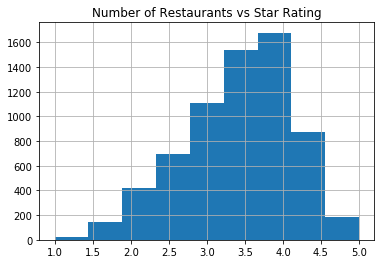

In [59]:
df_business['stars'].hist(bins=9)
plt.title('Number of Restaurants vs Star Rating')
f3 = plt.gcf

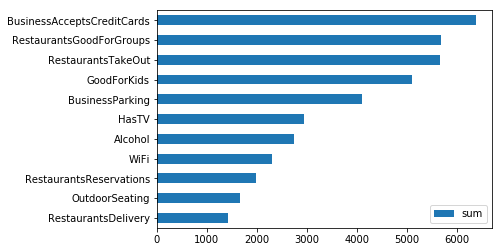

In [60]:
sum_true_col.sort_values('sum').plot.barh()
f1 = plt.gcf()

In [62]:
df_attributes['stars'] = df_business['stars']

df_attributes['stars'] = (df_attributes['stars']*2).astype(np.int32)
top3 = df_attributes.filter(['BusinessAcceptsCreditCards', 'RestaurantsGoodForGroups', 'RestaurantsTakeOut'])
# scatter_matrix(top3, alpha=1, figsize=(10,10))
df_attributes

,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,HasTV,RestaurantsTakeOut,RestaurantsGoodForGroups,WiFi,GoodForKids,Alcohol,BusinessParking,stars
0,0,1,0,1,0,1,1,0,1,1,1,8
1,0,1,0,0,1,1,1,0,1,1,1,9
2,0,1,0,0,0,1,1,0,1,0,1,4
3,0,1,0,1,1,0,1,0,0,1,1,4
4,0,1,0,0,0,0,0,0,0,0,0,9
5,0,1,0,0,0,1,1,0,1,0,1,7
6,0,1,0,0,0,0,1,1,1,1,1,6
7,0,1,0,0,0,1,1,0,1,0,1,7
8,0,1,1,0,0,1,1,0,1,0,1,8
9,0,1,0,0,1,1,1,0,0,1,1,8


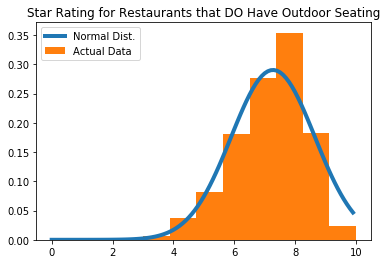

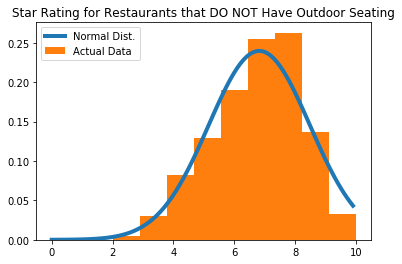

In [101]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

os_rating = df_attributes[df_attributes['OutdoorSeating'] == 1]['stars']
os_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(os_rating), np.std(os_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(os_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that DO Have Outdoor Seating')
plt.legend();
plt.show();

os_rating = df_attributes[df_attributes['OutdoorSeating'] == 0]['stars']
os_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(os_rating), np.std(os_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(os_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Have Outdoor Seating')
plt.legend();
plt.show();

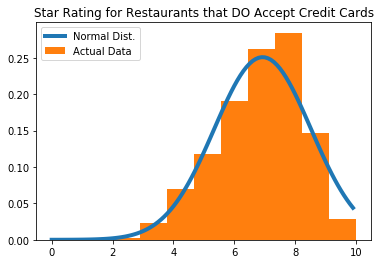

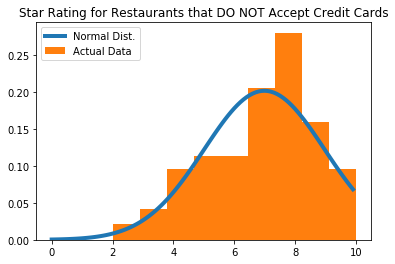

In [102]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

cc_rating = df_attributes[df_attributes['BusinessAcceptsCreditCards'] == 1]['stars']
cc_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(cc_rating), np.std(cc_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(cc_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO Accept Credit Cards')
plt.legend();
plt.show();

cc_rating = df_attributes[df_attributes['BusinessAcceptsCreditCards'] == 0]['stars']
cc_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(cc_rating), np.std(cc_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(cc_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Accept Credit Cards')
plt.legend();
plt.show();

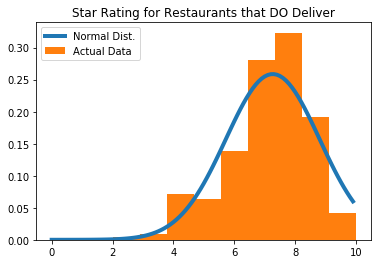

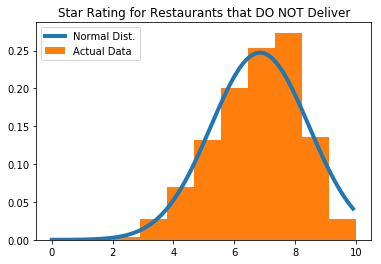

In [108]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

del_rating = df_attributes[df_attributes['RestaurantsDelivery'] == 1]['stars']
del_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(del_rating), np.std(del_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(del_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO Deliver')
plt.legend();
plt.show();

del_rating = df_attributes[df_attributes['RestaurantsDelivery'] == 0]['stars']
del_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(del_rating), np.std(del_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(del_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Deliver')
plt.legend();
plt.show();

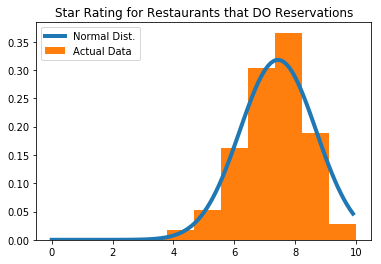

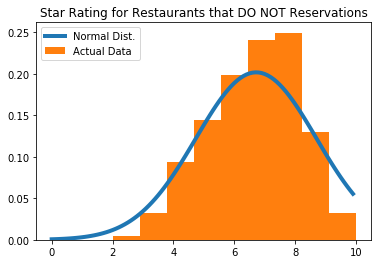

In [107]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

re_rating = df_attributes[df_attributes['RestaurantsReservations'] == 1]['stars']
re_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(re_rating), np.std(re_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(re_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO Reservations')
plt.legend();
plt.show();

re_rating = df_attributes[df_attributes['RestaurantsReservations'] == 0]['stars']
re_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(re_rating), np.std(re_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(re_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Reservations')
plt.legend();
plt.show();

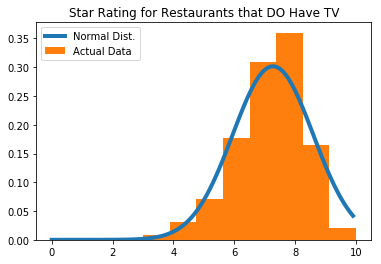

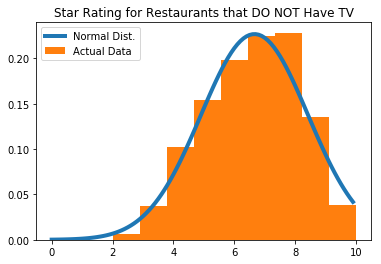

In [110]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

tv_rating = df_attributes[df_attributes['HasTV'] == 1]['stars']
tv_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(tv_rating), np.std(tv_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(tv_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that DO Have TV')
plt.legend();
plt.show();

tv_rating = df_attributes[df_attributes['HasTV'] == 0]['stars']
tv_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(tv_rating), np.std(tv_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(tv_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Have TV')
plt.legend();
plt.show();

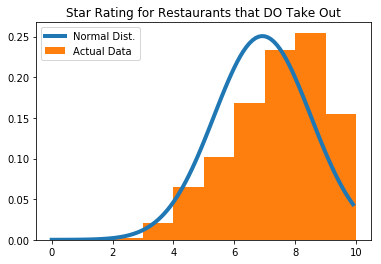

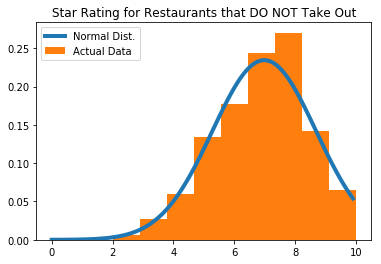

In [111]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

to_rating = df_attributes[df_attributes['RestaurantsTakeOut'] == 1]['stars']
to_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(to_rating), np.std(to_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(to_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that DO Take Out')
plt.legend();
plt.show();

to_rating = df_attributes[df_attributes['RestaurantsTakeOut'] == 0]['stars']
to_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(to_rating), np.std(to_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(to_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Take Out')
plt.legend();
plt.show();

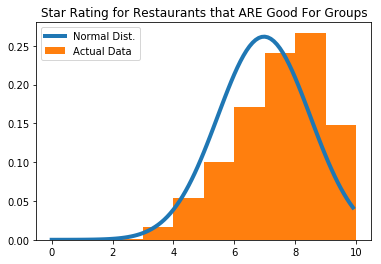

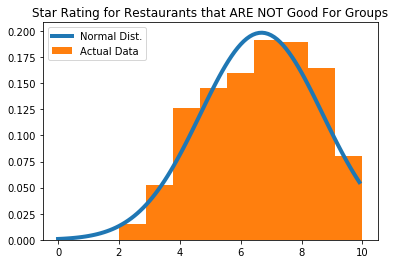

In [113]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

gg_rating = df_attributes[df_attributes['RestaurantsGoodForGroups'] == 1]['stars']
gg_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(gg_rating), np.std(gg_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gg_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that ARE Good For Groups')
plt.legend();
plt.show();

gg_rating = df_attributes[df_attributes['RestaurantsGoodForGroups'] == 0]['stars']
gg_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(gg_rating), np.std(gg_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gg_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that ARE NOT Good For Groups')
plt.legend();
plt.show();

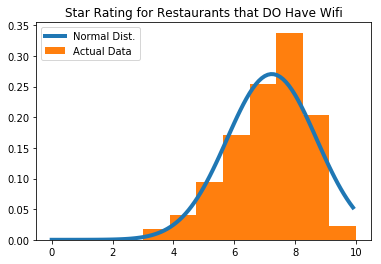

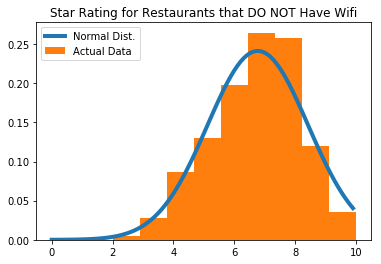

In [115]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

wf_rating = df_attributes[df_attributes['WiFi'] == 1]['stars']
wf_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(wf_rating), np.std(wf_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(wf_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that DO Have Wifi')
plt.legend();
plt.show();

wf_rating = df_attributes[df_attributes['WiFi'] == 0]['stars']
wf_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(wf_rating), np.std(wf_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(wf_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT Have Wifi')
plt.legend();
plt.show();

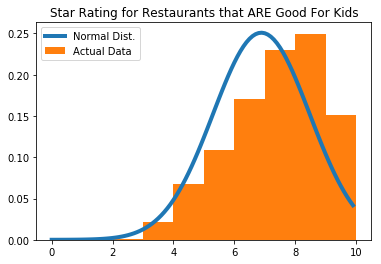

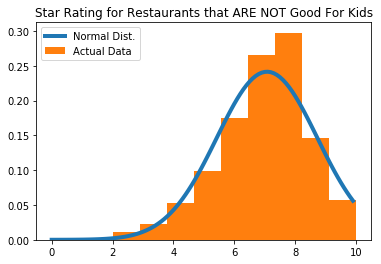

In [116]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

gc_rating = df_attributes[df_attributes['GoodForKids'] == 1]['stars']
gc_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(gc_rating), np.std(gc_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gc_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that ARE Good For Kids')
plt.legend();
plt.show();

gc_rating = df_attributes[df_attributes['GoodForKids'] == 0]['stars']
gc_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(gc_rating), np.std(gc_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(gc_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that ARE NOT Good For Kids')
plt.legend();
plt.show();

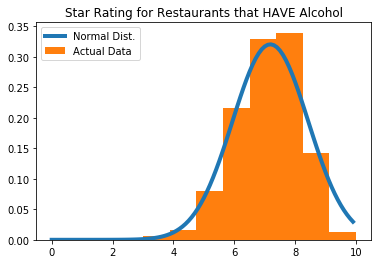

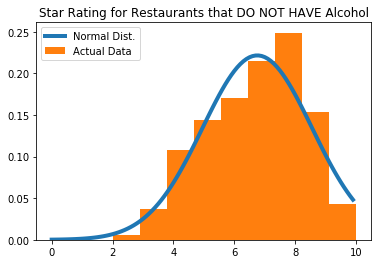

In [117]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

al_rating = df_attributes[df_attributes['Alcohol'] == 1]['stars']
al_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(al_rating), np.std(al_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(al_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that HAVE Alcohol')
plt.legend();
plt.show();

al_rating = df_attributes[df_attributes['Alcohol'] == 0]['stars']
al_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(al_rating), np.std(al_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(al_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT HAVE Alcohol')
plt.legend();
plt.show();

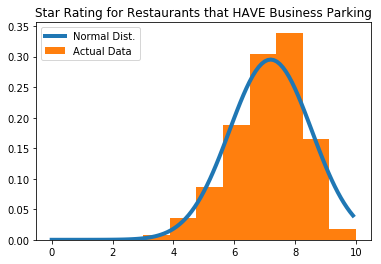

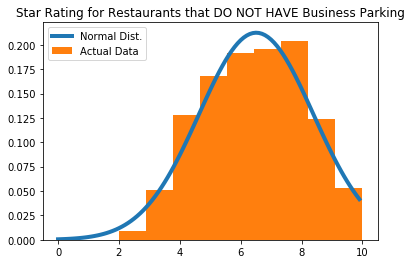

In [118]:
# NEEDED TO MULTIPLY THE RATING BY 2 IN ORDER TO NORMALIZE THE VALUES TO INTEGERS

bp_rating = df_attributes[df_attributes['BusinessParking'] == 1]['stars']
bp_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(bp_rating), np.std(bp_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(bp_rating, normed=True, label='Actual Data', bins=8);
plt.title('Star Rating for Restaurants that HAVE Business Parking')
plt.legend();
plt.show();

bp_rating = df_attributes[df_attributes['BusinessParking'] == 0]['stars']
bp_rating
xs = np.arange(0, 10, 0.1)
fit = stats.norm.pdf(xs, np.mean(bp_rating), np.std(bp_rating))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(bp_rating, normed=True, label='Actual Data', bins=9);
plt.title('Star Rating for Restaurants that DO NOT HAVE Business Parking')
plt.legend();
plt.show();